In [1]:
import pandas as pd
import numpy  as np
import csv
import matplotlib.pyplot as plt

In [2]:
people = pd.read_csv("people.csv")
act_train = pd.read_csv("act_train.csv")
act_test  = pd.read_csv("act_test.csv")

In [3]:
to_change = ['char_'+str(i) for i in range(1,11)]
act_test_id = act_test['activity_id']

In [4]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [5]:
act_train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [6]:
#people data pre process
def data_preprocess(data, dropped, changed_bool = None, changed_char = None, changed_n = None, date = True):
    if dropped:
        
        data = data.drop(dropped, axis = 1)
    if changed_bool:
        for item in changed_bool:
            data[item] =  pd.to_numeric(data[item]).astype(int)
    if changed_char:
        for item in changed_char:
            if 'group' in item:
                data[item] = data[item].fillna('gropu 0')
            else:
                data[item] = data[item].fillna('type 0')
            data[item] = [ i.split(' ')[1] for i in data[item]]
            data[item] = pd.to_numeric(data[item]).astype(int)
    if changed_n:
        for item in changed_n:
            data[item] = [i.split('_')[1] for i in data[item]]
            data[item] =pd.to_numeric(data[item]).astype(int)
    if date == True:
        to_replace = []
        for time in data['date']:
            time_data = time.split('-')
            time_data = ('').join(time_data)
            to_replace.append(time_data)

        data['date'] = [date for date in to_replace]
        data['date'] = pd.to_numeric(data['date'])
    
    return data

In [7]:
outcomes_1 = act_train[act_train['outcome'] > 0]
outcomes_0 = act_train[act_train['outcome'] == 0]
print(len(outcomes_1),len(outcomes_0))
plt.xticks((0,1),('class 1','class 0'))
plt.bar(left = (0,1), height = (len(outcomes_1), len(outcomes_0)), align = 'center')
plt.show()

975497 1221794


In [8]:
%matplotlib inline
plt.rc('figure', figsize=(10, 6))

char_list = ['char_'+ str(i) for i in range(1,10)]
char_list.extend(["char_"+str(i) for i in range(11,39)])
def get_relation(item,data):
    counts = data[item].value_counts()
    res = np.where(data['outcome']== 1, 1, 0)
    by_char_res = data.groupby([item, res])
    agg_counts = by_char_res.size().unstack()
    agg_counts.plot(kind = 'barh', stacked = True)

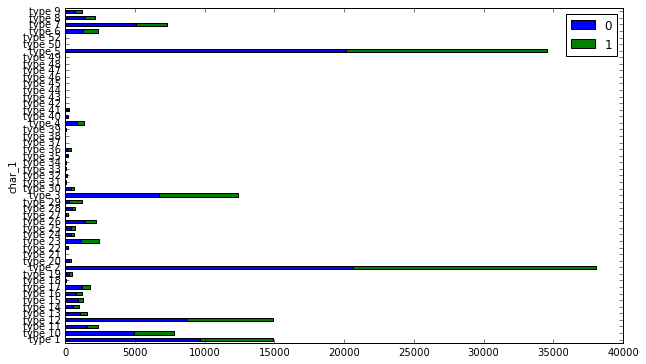

In [9]:
get_relation('char_1',act_train)

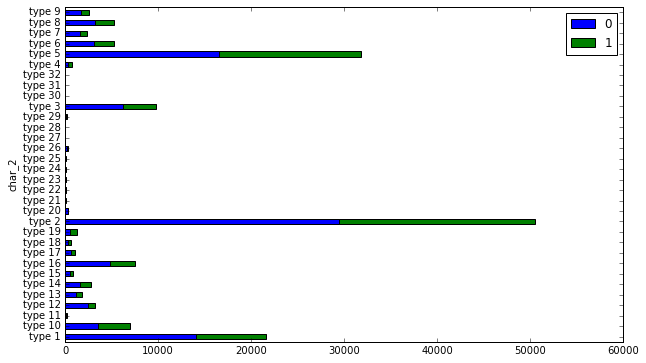

In [10]:
get_relation('char_2',act_train)

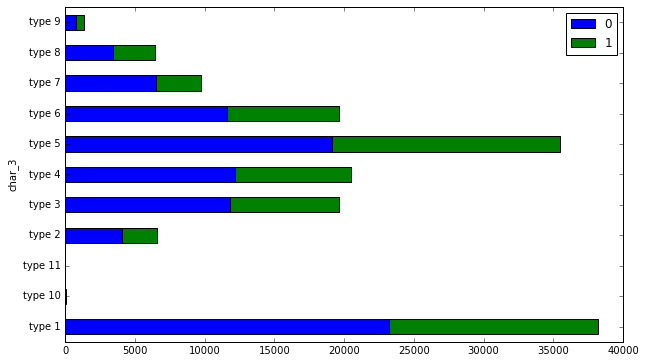

In [11]:
get_relation('char_3',act_train)

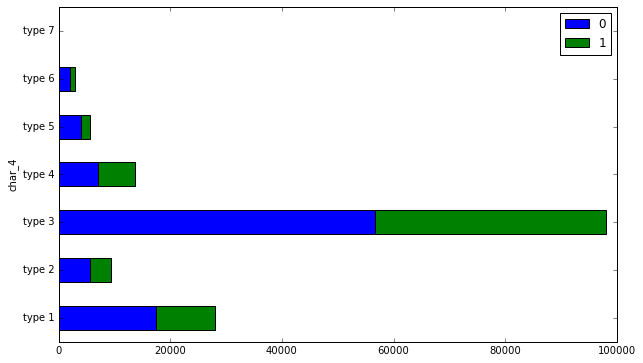

In [12]:
get_relation('char_4',act_train)

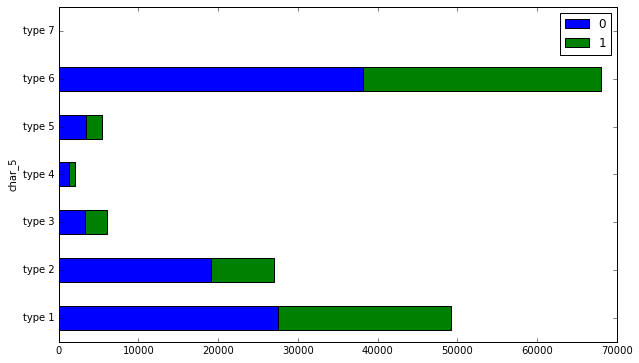

In [13]:
get_relation('char_5',act_train)

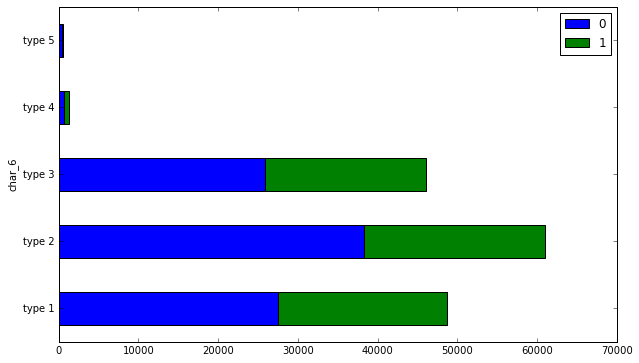

In [14]:
get_relation('char_6',act_train)

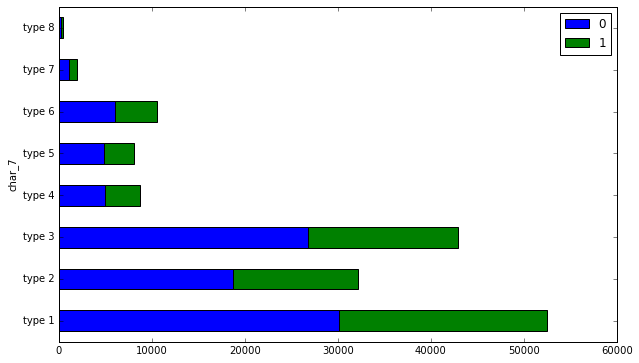

In [15]:
get_relation('char_7',act_train)

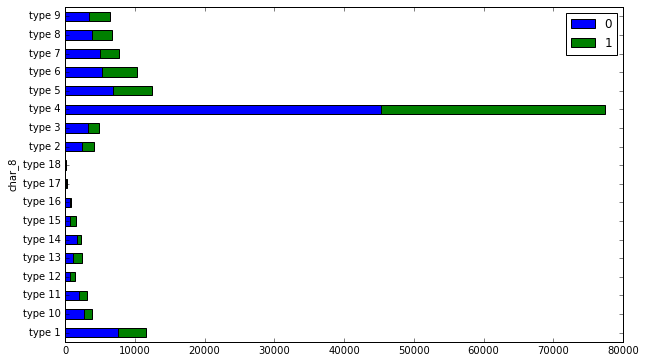

In [16]:
get_relation('char_8',act_train)

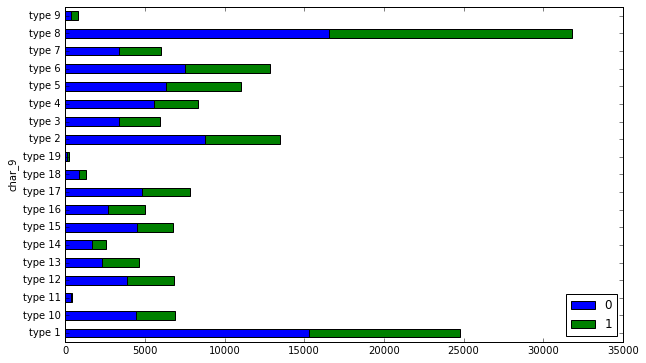

In [17]:
get_relation('char_9',act_train)

In [18]:
#act_train pre process

act_train = data_preprocess(act_train,to_change,None, ['activity_category'],['people_id','activity_id'], False)
print(act_train.head())

   people_id  activity_id        date  activity_category  outcome
0        100      1734928  2023-08-26                  4        0
1        100      2434093  2022-09-27                  2        0
2        100      3404049  2022-09-27                  2        0
3        100      3651215  2023-08-04                  2        0
4        100      4109017  2023-08-26                  2        0


In [19]:
#act_test pre process
act_test = data_preprocess(act_test,to_change,None, ['activity_category'],['people_id','activity_id'], False)
print(act_test.head())

   people_id  activity_id        date  activity_category
0     100004       249281  2022-07-20                  1
1     100004       230855  2022-07-20                  5
2      10001       240724  2022-10-14                  1
3      10001        83552  2022-11-27                  1
4      10001      1043301  2022-10-15                  5


In [20]:
people = data_preprocess(people,None,None, None,['people_id'])
act_people = pd.merge(act_train,people, how = 'left', on = 'people_id')
act_people.head()

,people_id,activity_id,date_x,activity_category,outcome,char_1,group_1,char_2,date_y,char_3,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,100,1734928,2023-08-26,4,0,type 2,group 17304,type 2,20210629,type 5,...,False,True,True,False,False,True,True,True,False,36
1,100,2434093,2022-09-27,2,0,type 2,group 17304,type 2,20210629,type 5,...,False,True,True,False,False,True,True,True,False,36
2,100,3404049,2022-09-27,2,0,type 2,group 17304,type 2,20210629,type 5,...,False,True,True,False,False,True,True,True,False,36
3,100,3651215,2023-08-04,2,0,type 2,group 17304,type 2,20210629,type 5,...,False,True,True,False,False,True,True,True,False,36
4,100,4109017,2023-08-26,2,0,type 2,group 17304,type 2,20210629,type 5,...,False,True,True,False,False,True,True,True,False,36


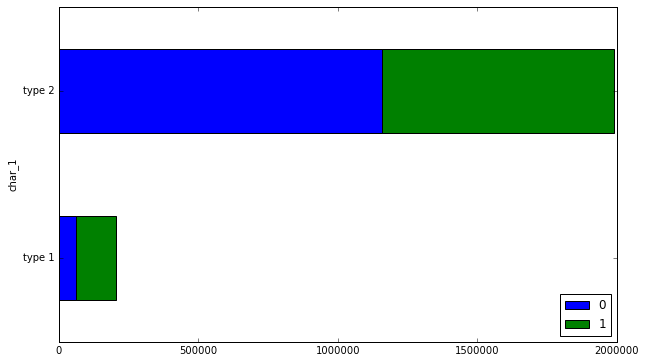

In [21]:
get_relation('char_1',act_people)

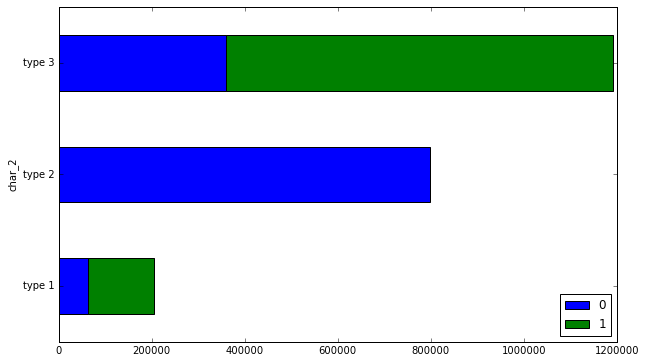

In [22]:
get_relation('char_2',act_people)

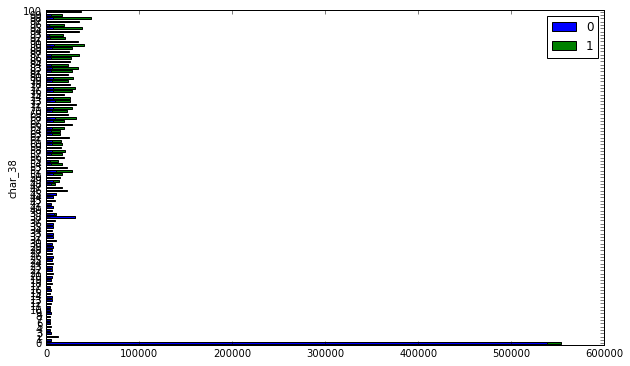

In [23]:
get_relation('char_38',act_people)

D:\Program Files (x86)\WinPython-64bit-3.4.4.1\python-3.4.4.amd64\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


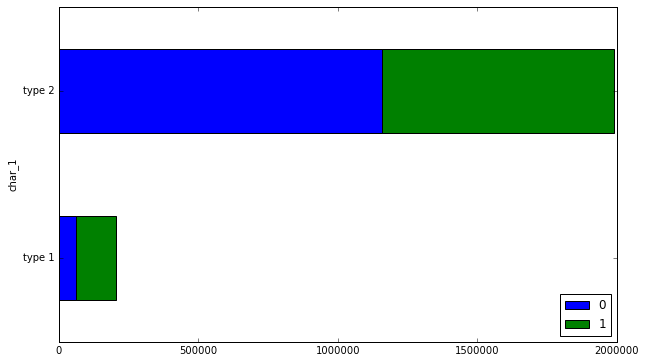

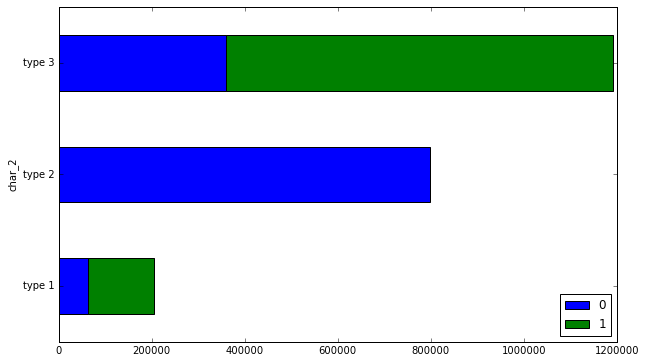

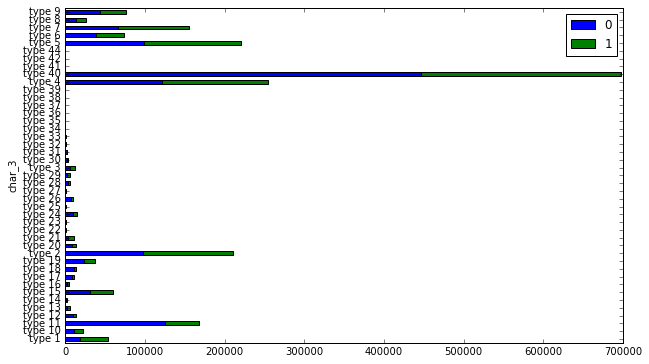

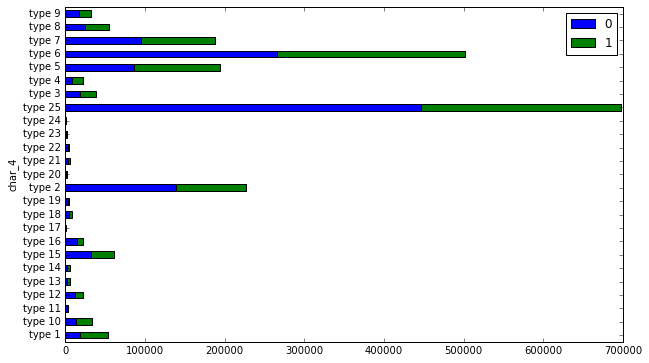

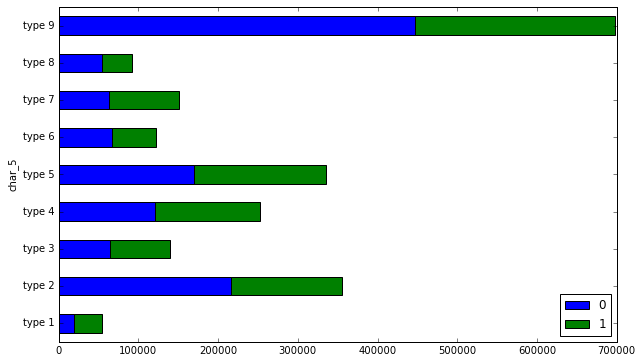

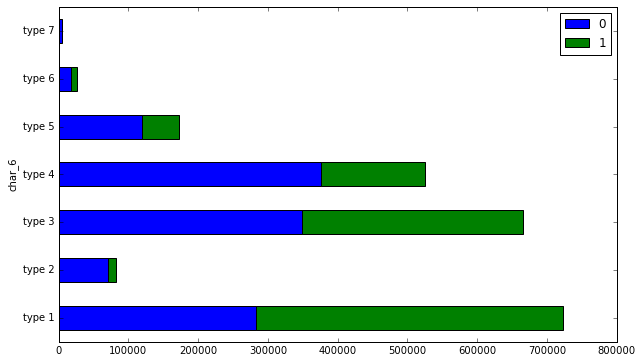

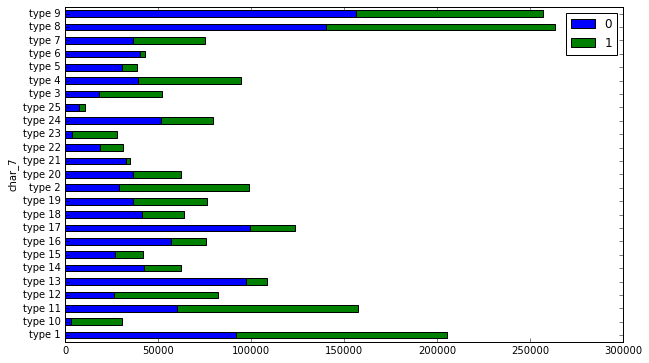

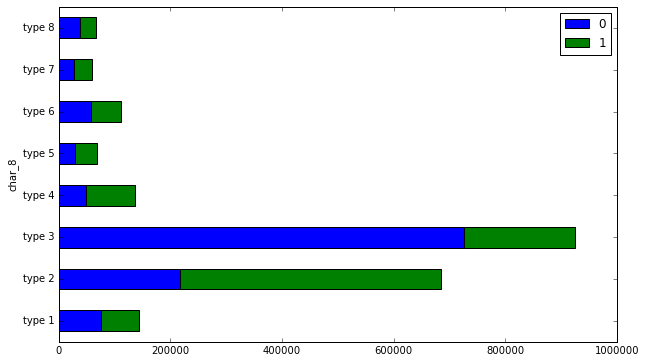

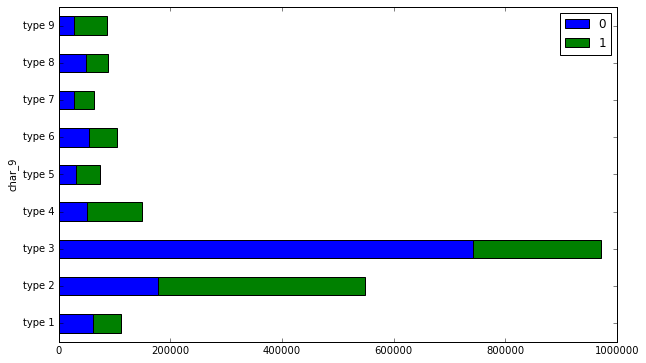

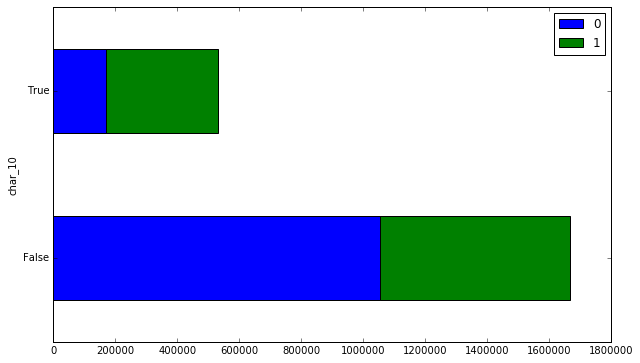

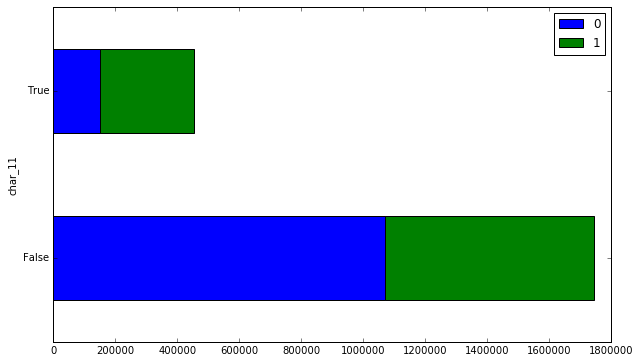

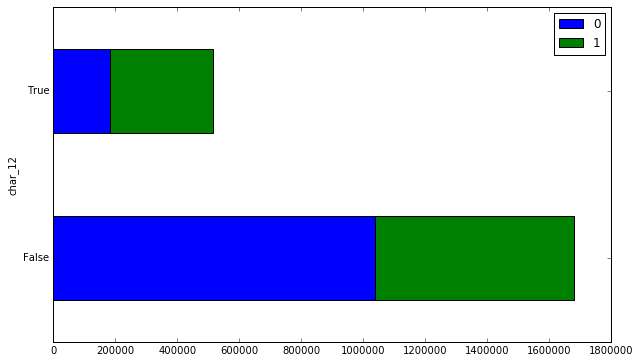

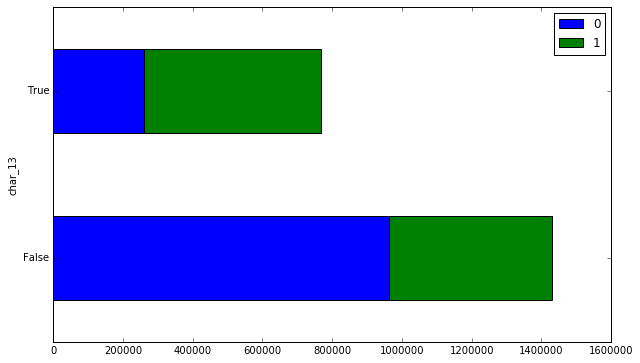

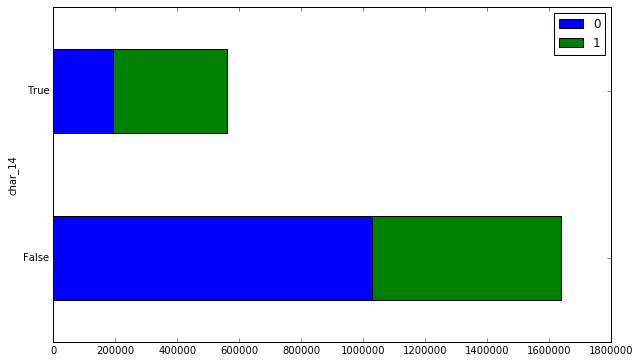

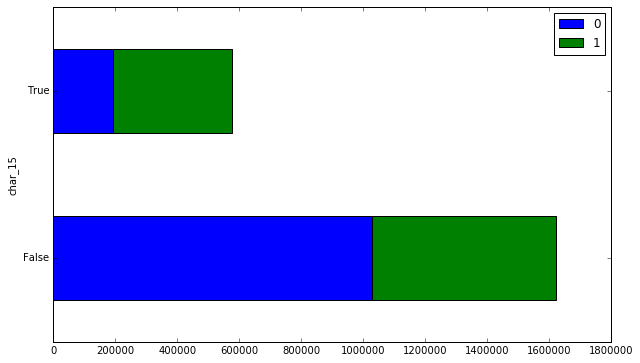

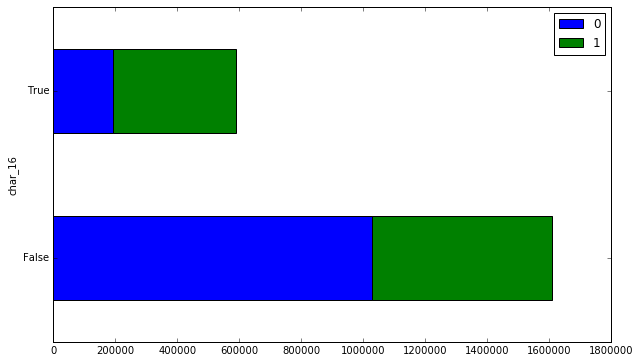

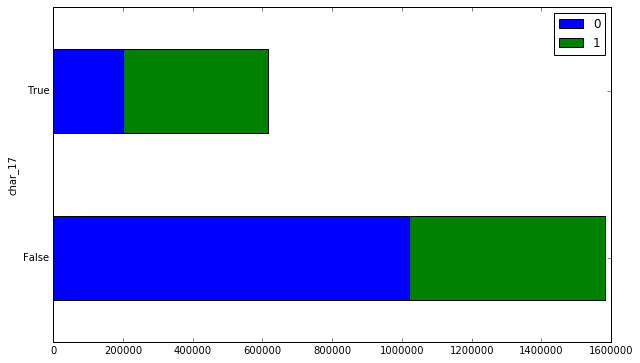

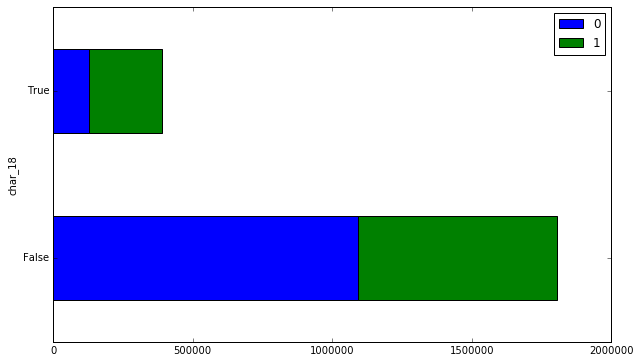

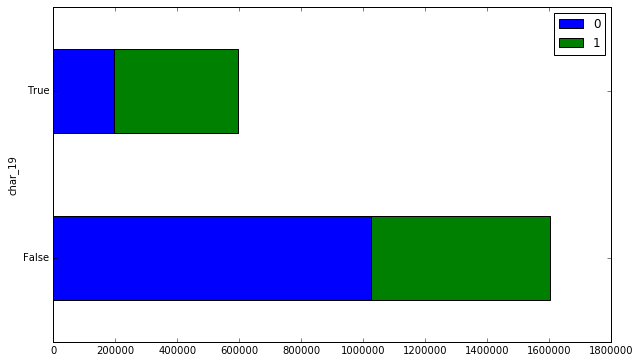

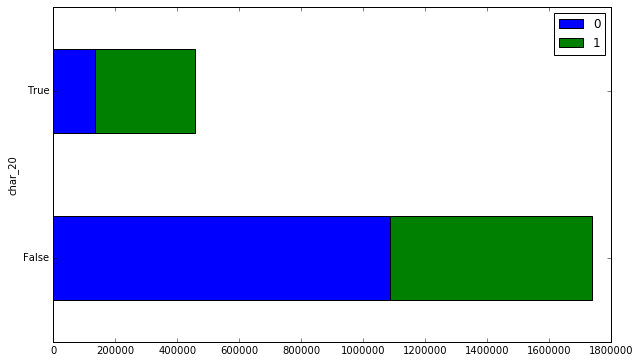

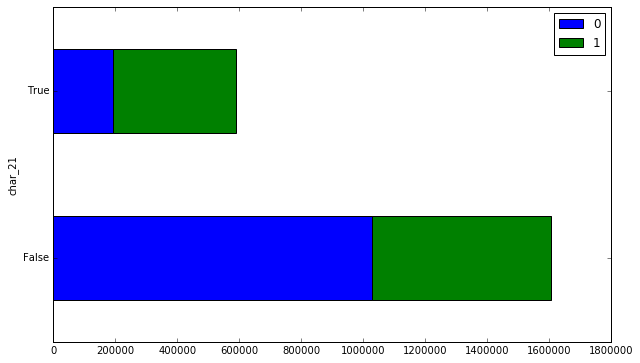

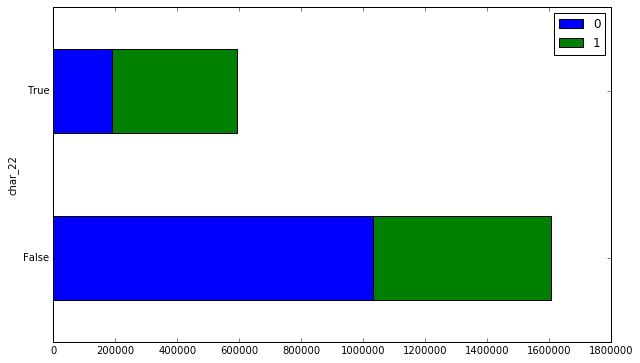

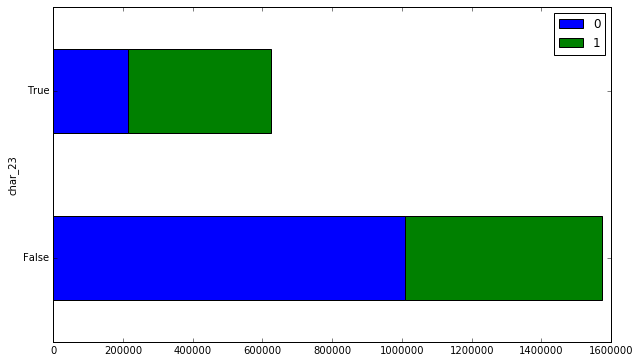

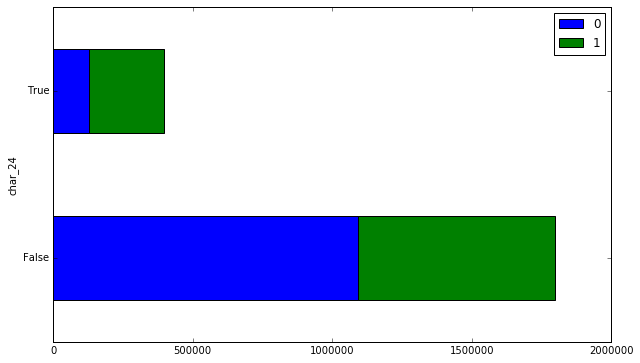

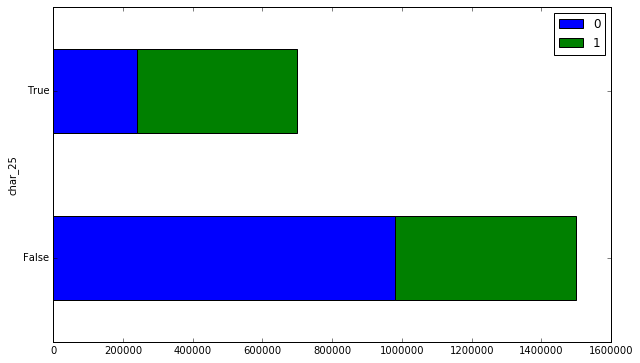

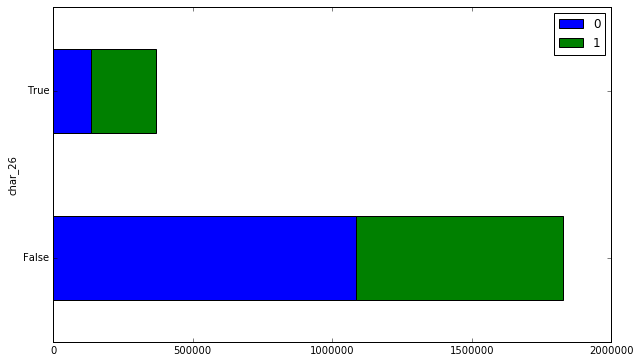

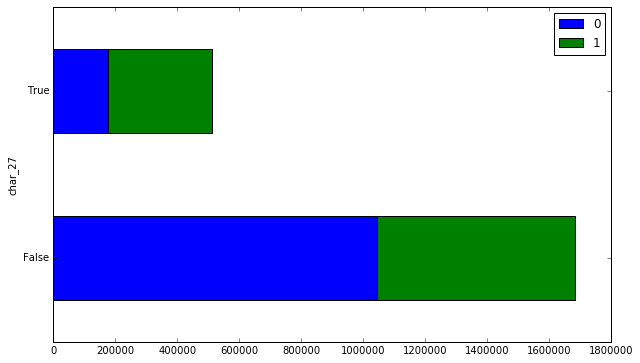

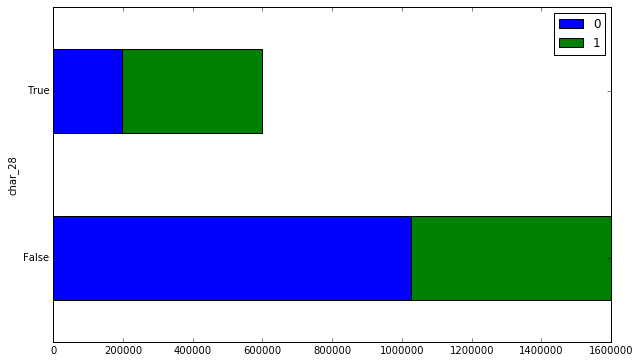

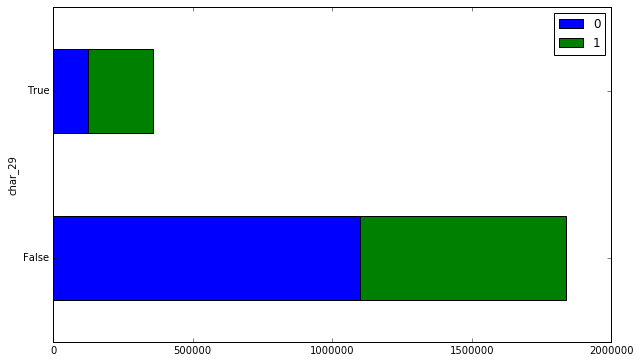

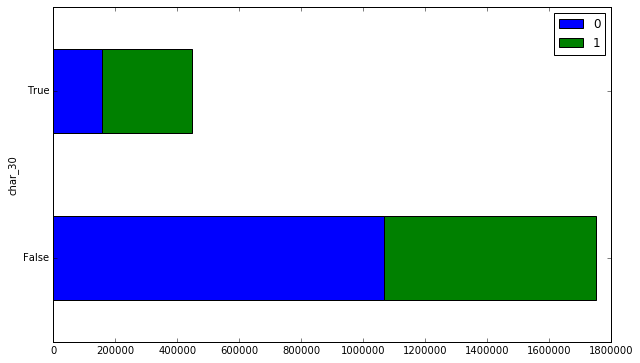

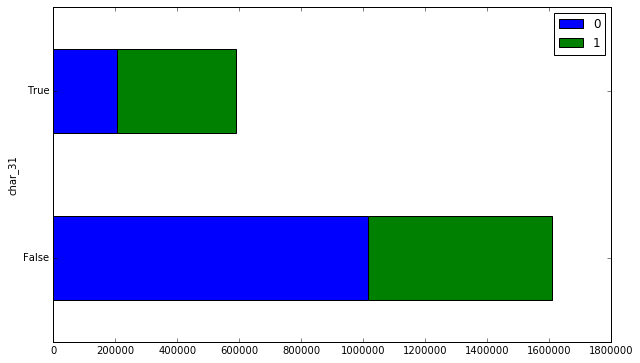

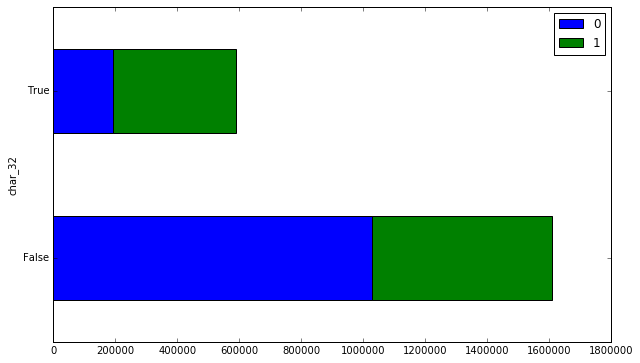

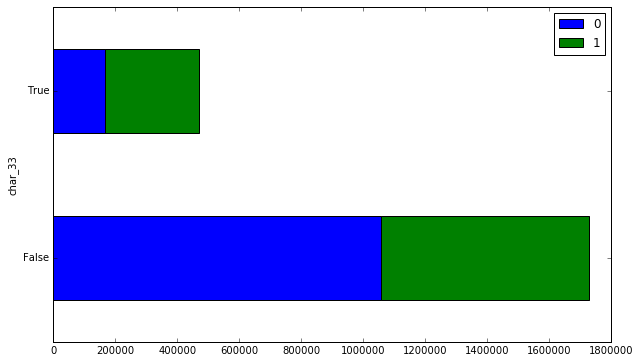

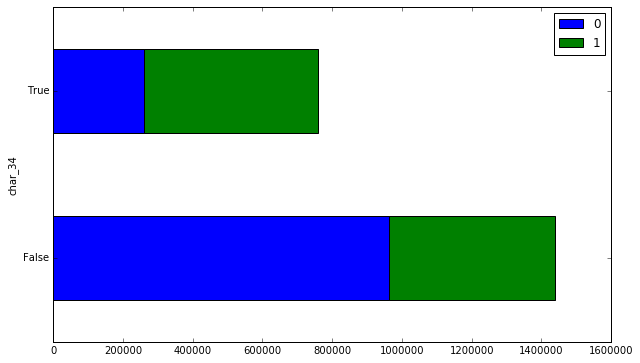

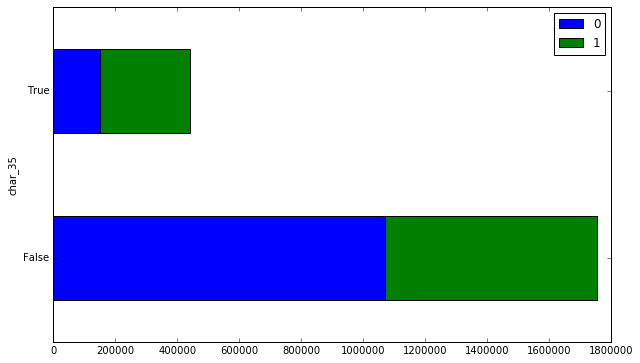

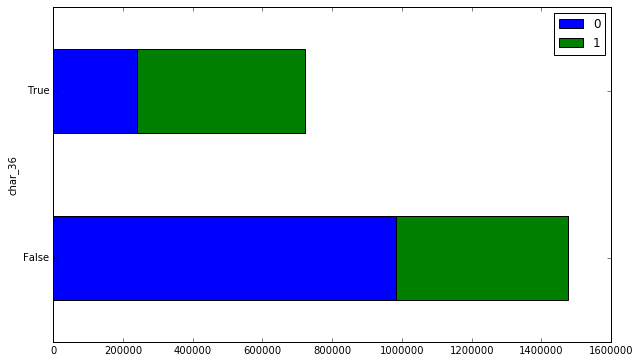

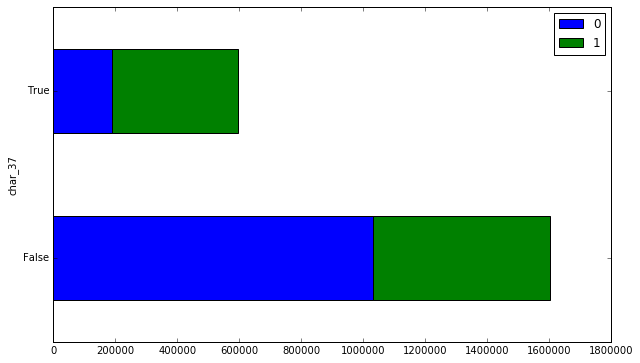

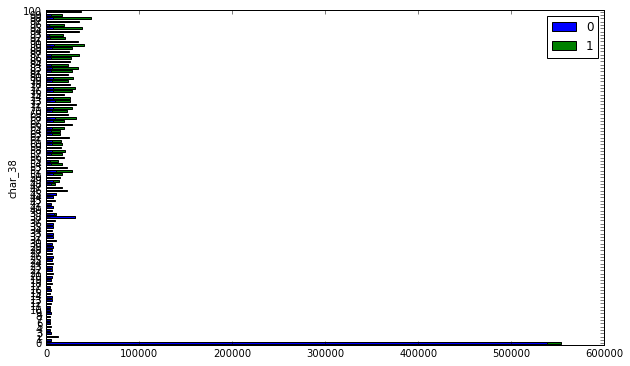

In [24]:
char_list = ['char_' + str(i) for i in range(1,39)]
for char_item in char_list:
    get_relation(char_item, act_people)

In [25]:
def process_date(data):
    year = []
    month = []
    day = []
    for time in data['date']:
        time_data = time.split('-')
        year.append(time_data[0])
        month.append(time_data[1])
        day.append(time_data[2])
    
    data['year'] = pd.to_numeric(year).astype(int)
    data['month'] = pd.to_numeric(month).astype(int)
    data['day'] =  pd.to_numeric(day).astype(int)
    return data

In [36]:
#people pre process
people = pd.read_csv("people.csv")
to_drop = ['date', 'char_10' , 'char_11','char_13',
            'char_14' , 'char_16', 'char_17', 'char_19' , 'char_20' , 'char_21', 'char_22', 'char_23', 'char_24','char_25',
          'char_26', 'char_27', 'char_29', 'char_31','char_32', 'char_33', 'char_34' , 'char_35' , 'char_36', 
          ]
char_changed = ['char_1','char_2', 'group_1', 'char_3', 'char_4', 'char_5','char_6','char_7','char_8','char_9']
changed_bool = ['char_18' , 'char_30', 'char_15','char_37','char_28', 'char_12', ]
process_date(people)
people = data_preprocess(people,to_drop, changed_bool, char_changed,['people_id'], False)
people.head()

,people_id,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_12,char_15,char_18,char_28,char_30,char_37,char_38,year,month,day
0,100,2,17304,2,5,5,5,3,11,2,...,0,0,0,1,1,0,36,2021,6,29
1,100002,2,8688,3,28,9,5,3,11,2,...,1,0,0,0,1,0,76,2021,1,6
2,100003,2,33592,3,4,8,5,2,5,2,...,1,1,0,1,0,1,99,2022,6,10
3,100004,2,22593,3,40,25,9,4,16,2,...,1,0,1,1,1,1,76,2022,7,20
4,100006,2,6534,3,40,25,9,3,8,2,...,0,0,0,0,0,0,84,2022,7,27


In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [38]:
def get_auc_curve(predict, actual):
    fpr, tpr , th = roc_curve(actual, predict)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [41]:
process_date(act_train)
# act_train = data_preprocess(act_train,None,None,None,None)
act_train_merge = pd.merge(act_train, people, how = 'left', on = 'people_id')
act_train_merge = act_train_merge.drop('date', axis = 1)
(act_train_merge.head())

,people_id,activity_id,activity_category,outcome,year_x,month_x,day_x,char_1,group_1,char_2,...,char_12,char_15,char_18,char_28,char_30,char_37,char_38,year_y,month_y,day_y
0,100,1734928,4,0,2023,8,26,2,17304,2,...,0,0,0,1,1,0,36,2021,6,29
1,100,2434093,2,0,2022,9,27,2,17304,2,...,0,0,0,1,1,0,36,2021,6,29
2,100,3404049,2,0,2022,9,27,2,17304,2,...,0,0,0,1,1,0,36,2021,6,29
3,100,3651215,2,0,2023,8,4,2,17304,2,...,0,0,0,1,1,0,36,2021,6,29
4,100,4109017,2,0,2023,8,26,2,17304,2,...,0,0,0,1,1,0,36,2021,6,29


In [43]:
process_date(act_test)
# act_test = data_preprocess(act_test,None,None,None,None)
act_test_merge = pd.merge(act_test, people, how = 'left', on = 'people_id')
act_test_merge = act_test_merge.drop('date', axis = 1)
(act_test_merge.head())

,people_id,activity_id,activity_category,year_x,month_x,day_x,char_1,group_1,char_2,char_3,...,char_12,char_15,char_18,char_28,char_30,char_37,char_38,year_y,month_y,day_y
0,100004,249281,1,2022,7,20,2,22593,3,40,...,1,0,1,1,1,1,76,2022,7,20
1,100004,230855,5,2022,7,20,2,22593,3,40,...,1,0,1,1,1,1,76,2022,7,20
2,10001,240724,1,2022,10,14,2,25417,3,6,...,1,1,0,1,1,1,90,2022,10,14
3,10001,83552,1,2022,11,27,2,25417,3,6,...,1,1,0,1,1,1,90,2022,10,14
4,10001,1043301,5,2022,10,15,2,25417,3,6,...,1,1,0,1,1,1,90,2022,10,14


In [44]:
#Train Model
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score


In [45]:
labels = act_train_merge['outcome']
features = act_train_merge.drop('outcome', axis = 1)

In [46]:
X_train, x_test, Y_train, y_test = train_test_split(features, labels, test_size = 0.20, random_state = 42)

The aoc accuracy is 0.991632717684
The r2 accuracy is 0.966594572869


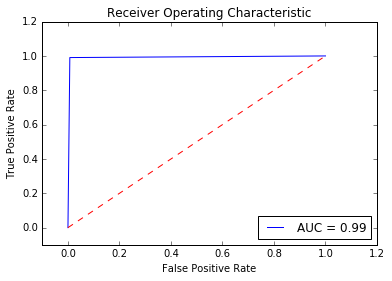

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
proba = dt.predict_proba(x_test)
preds = proba[:,1]
print('The aoc accuracy is %s'%(str(roc_auc_score(y_test,preds))))
print('The r2 accuracy is %s'%(str(r2_score(y_test, preds))))
%matplotlib inline
get_auc_curve(preds, y_test)

In [48]:
test_proba = dt.predict_proba(act_test_merge)
test_predict = test_proba[:,1]
RedHat = pd.DataFrame({'activity_id': act_test_id, 'outcome': test_predict})
RedHat.to_csv("redhat_dt1021.csv", index = False)

The aoc accuracy is 0.999233220442
The r2 accuracy is 0.970484742276


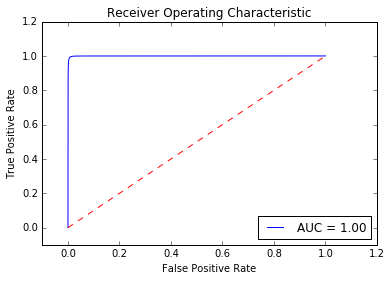

In [49]:
dt = RandomForestClassifier()
dt.fit(X_train,Y_train)
proba = dt.predict_proba(x_test)
preds = proba[:,1]
print('The aoc accuracy is %s'%(str(roc_auc_score(y_test, preds))))
print('The r2 accuracy is %s'%(str(r2_score(y_test, preds))))
%matplotlib inline
get_auc_curve(preds, y_test)

In [50]:
test_proba = dt.predict_proba(act_test_merge)
test_predict = test_proba[:,1]
RedHat = pd.DataFrame({'activity_id': act_test_id, 'outcome': test_predict})
RedHat.to_csv("redhat_rf1021.csv", index = False)

In [51]:
from  sklearn.grid_search import GridSearchCV

In [52]:
dt_parameters = { 'max_depth':[3,4,5] }
dt_tune = DecisionTreeClassifier()
grid_obj = GridSearchCV(dt_tune, dt_parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

The aoc accuracy is 0.914608433605
The r2 accuracy is 0.574087108475


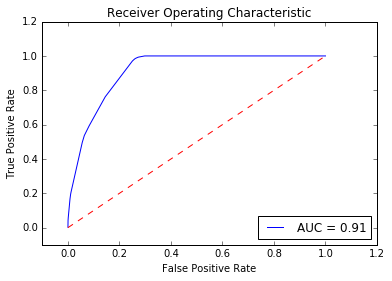

In [53]:
clf = grid_obj.best_estimator_
proba = clf.predict_proba(x_test)
preds = proba[:,1]
print('The aoc accuracy is %s'%(str(roc_auc_score(y_test, preds))))
print('The r2 accuracy is %s'%(str(r2_score(y_test, preds))))
%matplotlib inline
get_auc_curve(preds, y_test)

In [54]:
test_proba = clf.predict_proba(act_test_merge)
test_predict = test_proba[:,1]
RedHat = pd.DataFrame({'activity_id': act_test_id, 'outcome': test_predict})
RedHat.to_csv("redhat_dt_tune.csv", index = False)

In [55]:
rf_parameters = { 'max_depth':[3,4,5] }
rf_tune =RandomForestClassifier()
grid_obj = GridSearchCV(rf_tune, rf_parameters)
grid_obj = grid_obj.fit(X_train, Y_train)

The aoc accuracy is 0.923052859673
The r2 accuracy is 0.565725795785


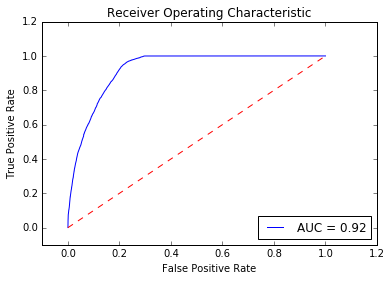

In [56]:
clf = grid_obj.best_estimator_
proba = clf.predict_proba(x_test)
preds = proba[:,1]
print('The aoc accuracy is %s'%(str(roc_auc_score(y_test, preds))))
print('The r2 accuracy is %s'%(str(r2_score(y_test, preds))))
%matplotlib inline
get_auc_curve(preds, y_test)

In [57]:
test_proba = clf.predict_proba(act_test_merge)
test_predict = test_proba[:,1]
RedHat = pd.DataFrame({'activity_id': act_test_id, 'outcome': test_predict})
RedHat.to_csv("redhat_rf_tune.csv", index = False)

The aoc accuracy is 0.999069656792
The r2 accuracy is 0.966121054464


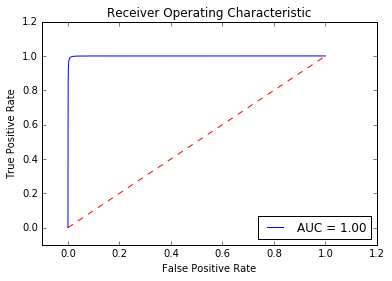

In [59]:
X_train, x_test, Y_train, y_test = train_test_split(features, labels, test_size = 0.30, random_state = 42)
dt = RandomForestClassifier()
dt.fit(X_train,Y_train)
proba = dt.predict_proba(x_test)
preds = proba[:,1]
print('The aoc accuracy is %s'%(str(roc_auc_score(y_test, preds))))
print('The r2 accuracy is %s'%(str(r2_score(y_test, preds))))
%matplotlib inline
get_auc_curve(preds, y_test)

The aoc accuracy is 0.999097373121
The r2 accuracy is 0.966419829243


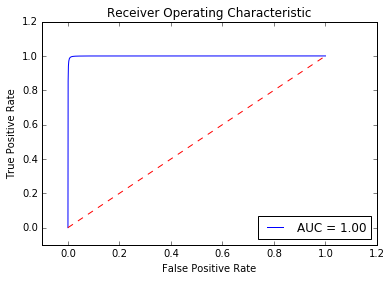

In [58]:
X_train, x_test, Y_train, y_test = train_test_split(features, labels, test_size = 0.40, random_state = 42)
dt = RandomForestClassifier()
dt.fit(X_train,Y_train)
proba = dt.predict_proba(x_test)
preds = proba[:,1]
print('The aoc accuracy is %s'%(str(roc_auc_score(y_test, preds))))
print('The r2 accuracy is %s'%(str(r2_score(y_test, preds))))
%matplotlib inline
get_auc_curve(preds, y_test)

The aoc accuracy is 0.999349014098
The r2 accuracy is 0.973567981335


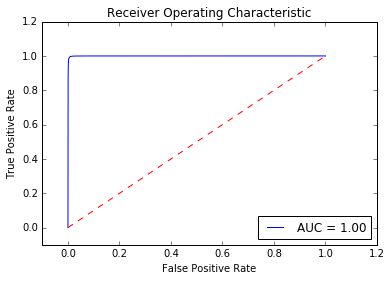

In [60]:
X_train, x_test, Y_train, y_test = train_test_split(features, labels, test_size = 0.10, random_state = 42)
dt = RandomForestClassifier()
dt.fit(X_train,Y_train)
proba = dt.predict_proba(x_test)
preds = proba[:,1]
print('The aoc accuracy is %s'%(str(roc_auc_score(y_test, preds))))
print('The r2 accuracy is %s'%(str(r2_score(y_test, preds))))
%matplotlib inline
get_auc_curve(preds, y_test)